# EX01

#### Write a correlation factor to understand the columns with the strongest correlation between the target (column "knight") and the features (all the other columns).

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('../Train_knight.csv')

## Correlation Analysis

## Correlation Analysis

The `df.corr()` method calculates the Pearson correlation coefficient between all numerical columns in a DataFrame, returning a correlation matrix with values on a -1 to 1 scale.

A correlation of 1 indicates a perfect positive relationship, -1 indicates a perfect negative relationship, and 0 indicates no linear relationship between variables.

This method is particularly useful for:
- Identifying the strongest linear relationships between variables
- Feature selection and understanding data patterns
- Data exploration and preprocessing

### Handling Categorical Variables

For categorical variables like our "knight" column (containing "Sith" and "Jedi"), direct correlation calculation isn't possible since Pearson correlation requires numerical data. However, we can handle this by:

1. **Label Encoding**: Converting categories to numbers (e.g., Sith=0, Jedi=1)
2. **One-Hot Encoding**: Creating binary columns for each category
3. **Alternative Statistical Measures**: 
    - Cramér's V for categorical-categorical relationships
    - Point-biserial correlation for categorical-numerical relationships

**One-hot encoding** transforms categorical variables into multiple binary (0/1) columns, where each column represents one category. For example, the "knight" column would become two columns: "knight_Sith" and "knight_Jedi", with 1 indicating the presence of that category and 0 indicating absence.

In [3]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
df.head(15)

,Sensitivity,Hability,Strength,Power,Agility,Dexterity,Awareness,Prescience,Reactivity,Midi-chlorien,...,Evade,Stims,Sprint,Combo,Delay,Attunement,Empowered,Burst,Grasping,knight
0,11.80,17.26,75.26,431.9,0.09087,0.06232,0.028530,0.016380,0.1847,0.06019,...,24.49,86.00,562.0,0.12440,0.17260,0.144900,0.05356,0.2779,0.08121,Sith
1,19.81,22.15,130.00,1260.0,0.09831,0.10270,0.147900,0.094980,0.1582,0.05395,...,30.88,186.80,2398.0,0.15120,0.31500,0.537200,0.23880,0.2768,0.07615,Jedi
2,10.97,17.20,71.73,371.5,0.08915,0.11130,0.094570,0.036130,0.1489,0.06640,...,26.87,90.14,476.4,0.13910,0.40820,0.477900,0.15550,0.2540,0.09532,Sith
3,11.62,18.18,76.38,408.8,0.11750,0.14830,0.102000,0.055640,0.1957,0.07255,...,25.40,88.14,528.1,0.17800,0.28780,0.318600,0.14160,0.2660,0.09270,Sith
4,11.26,19.83,71.30,388.1,0.08511,0.04413,0.005067,0.005664,0.1637,0.06343,...,26.43,76.38,435.9,0.11080,0.07723,0.025330,0.02832,0.2557,0.07613,Sith
5,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.110300,0.057780,0.1770,0.05340,...,24.70,129.10,1228.0,0.08822,0.19630,0.253500,0.09181,0.2369,0.06558,Jedi
6,15.08,25.74,98.00,716.6,0.10240,0.09769,0.123500,0.065530,0.1647,0.06464,...,33.22,121.20,1050.0,0.16600,0.23560,0.402900,0.15260,0.2654,0.09438,Jedi
7,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.450400,0.24300,0.3613,0.08758,Jedi
8,19.89,20.26,130.50,1214.0,0.10370,0.13100,0.141100,0.094310,0.1802,0.06188,...,25.23,160.50,1646.0,0.14170,0.33090,0.418500,0.16130,0.2549,0.09136,Jedi
9,12.70,12.17,80.88,495.0,0.08785,0.05794,0.023600,0.024020,0.1583,0.06275,...,16.92,88.12,566.9,0.13140,0.16070,0.093850,0.08224,0.2775,0.09464,Sith


In [7]:
from sklearn.preprocessing import LabelEncoder

# Reverse the label encoding mapping
print(f"Reversed label mapping: Jedi=1, Sith=0")
df.head(15)

# Create label encoder and fit it to the knight column
label_encoder = LabelEncoder()
df['knight'] = label_encoder.fit_transform(df['knight'])

# Display the mapping
print(f"Label encoding mapping: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")

# Since we want Jedi=1 and Sith=0, let's check if we need to reverse
if label_encoder.transform(['Jedi'])[0] == 0:
    # If Jedi is encoded as 0, we need to reverse (1-x)
    df['knight'] = 1 - df['knight']
    print("Encoding reversed: Jedi=1, Sith=0")
else:
    print("Encoding is correct: Jedi=1, Sith=0")

print(f"\nValue counts after encoding:")
print(df['knight'].value_counts().sort_index())


Reversed label mapping: Jedi=1, Sith=0
Label encoding mapping: {'Jedi': np.int64(0), 'Sith': np.int64(1)}
Encoding reversed: Jedi=1, Sith=0

Value counts after encoding:
knight
0    246
1    152
Name: count, dtype: int64


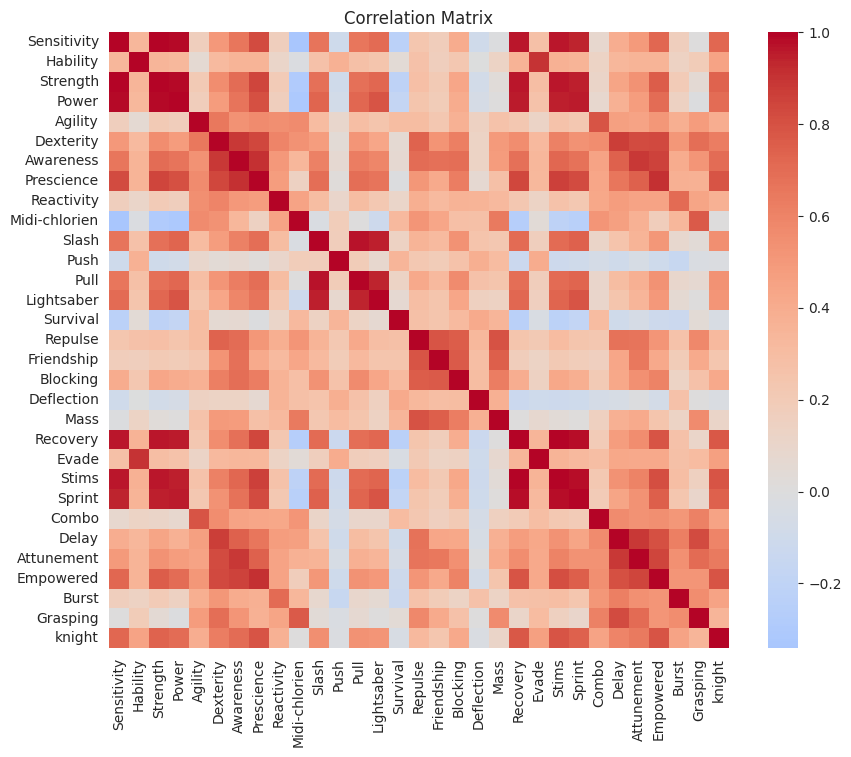

In [8]:
# Calculate correlation with target variable
correlation_with_target = df.corr()['knight']

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [9]:
correlation_with_target.sort_values(ascending=False)

knight           1.000000
Empowered        0.793652
Prescience       0.790066
Stims            0.786797
Recovery         0.777633
Sprint           0.739672
Strength         0.737403
Sensitivity      0.721566
Power            0.700709
Awareness        0.699662
Attunement       0.648893
Dexterity        0.631987
Delay            0.598072
Slash            0.550663
Pull             0.537800
Lightsaber       0.515340
Evade            0.465605
Hability         0.446632
Burst            0.445847
Combo            0.445223
Blocking         0.421950
Agility          0.397458
Reactivity       0.375103
Grasping         0.350105
Repulse          0.324399
Friendship       0.236633
Mass             0.113185
Midi-chlorien    0.008132
Push            -0.019446
Deflection      -0.026489
Survival        -0.043099
Name: knight, dtype: float64

## Correlation Analysis Results Interpretation

Based on the correlation values with the target variable "knight" (where **Jedi=1, Sith=0**), here's what we can interpret:

### **Strongest Positive Correlations (Most Jedi-like traits)**
- **Empowered (0.794)**: Strongest predictor - Jedi tend to be more empowered
- **Prescience (0.790)**: High foresight ability strongly associated with Jedi
- **Stims (0.787)**: Usage of stimulants/enhancements more common in Jedi
- **Recovery (0.778)**: Better recovery abilities in Jedi
- **Sprint (0.740)** & **Strength (0.737)**: Physical prowess favors Jedi

### **Moderate Positive Correlations**
- **Sensitivity (0.722)**, **Power (0.701)**, **Awareness (0.700)**: Force-related abilities
- **Attunement (0.649)**, **Dexterity (0.632)**: Combat skills

### **Negative Correlations (Sith-like traits)**
These features are **more associated with Sith** (negative correlation means lower values for Jedi):
- **Survival (-0.043)**: Sith slightly better at survival situations
- **Deflection (-0.026)**: Sith slightly better at deflecting attacks
- **Push (-0.019)**: Sith use Force push more effectively

### **Weak/No Correlation**
- **Midi-chlorien (0.008)**: Virtually no predictive power - surprising since it's often considered important in Star Wars lore
- **Mass (0.113)**: Physical size doesn't strongly determine knight type

### **Key Insights**
1. **Light Side traits** (empowerment, prescience, enhancement) strongly correlate with Jedi
2. **Aggressive abilities** (survival, deflection, push) slightly favor Sith
3. **Midi-chlorian count** is surprisingly uninformative for classification
4. The correlation suggests Jedi rely more on enhancement and foresight abilities, while Sith focus on aggressive combat techniques